### Fine tuning a model with `torchvision`

In [1]:
from IPython.display import YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [2]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.optim as optim
import torch

### Using `pytorch` to build convolutional network

![](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

In [3]:
from IPython.display import Image

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 189kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.43MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.2MB/s]


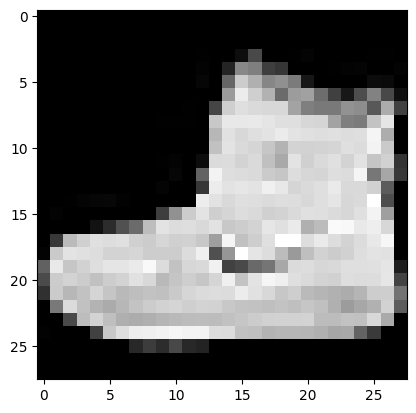

In [4]:
train = FashionMNIST('.', download = True)
plt.imshow(train[0][0], cmap = 'gray')

In [5]:
train = FashionMNIST('.', download = True, transform=ToTensor())
trainloader = DataLoader(train, batch_size = 32)

In [6]:
train[0][0].shape

torch.Size([1, 28, 28])

In [7]:
conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding = 1)

In [8]:
output = conv1(train[0][0].unsqueeze(0))

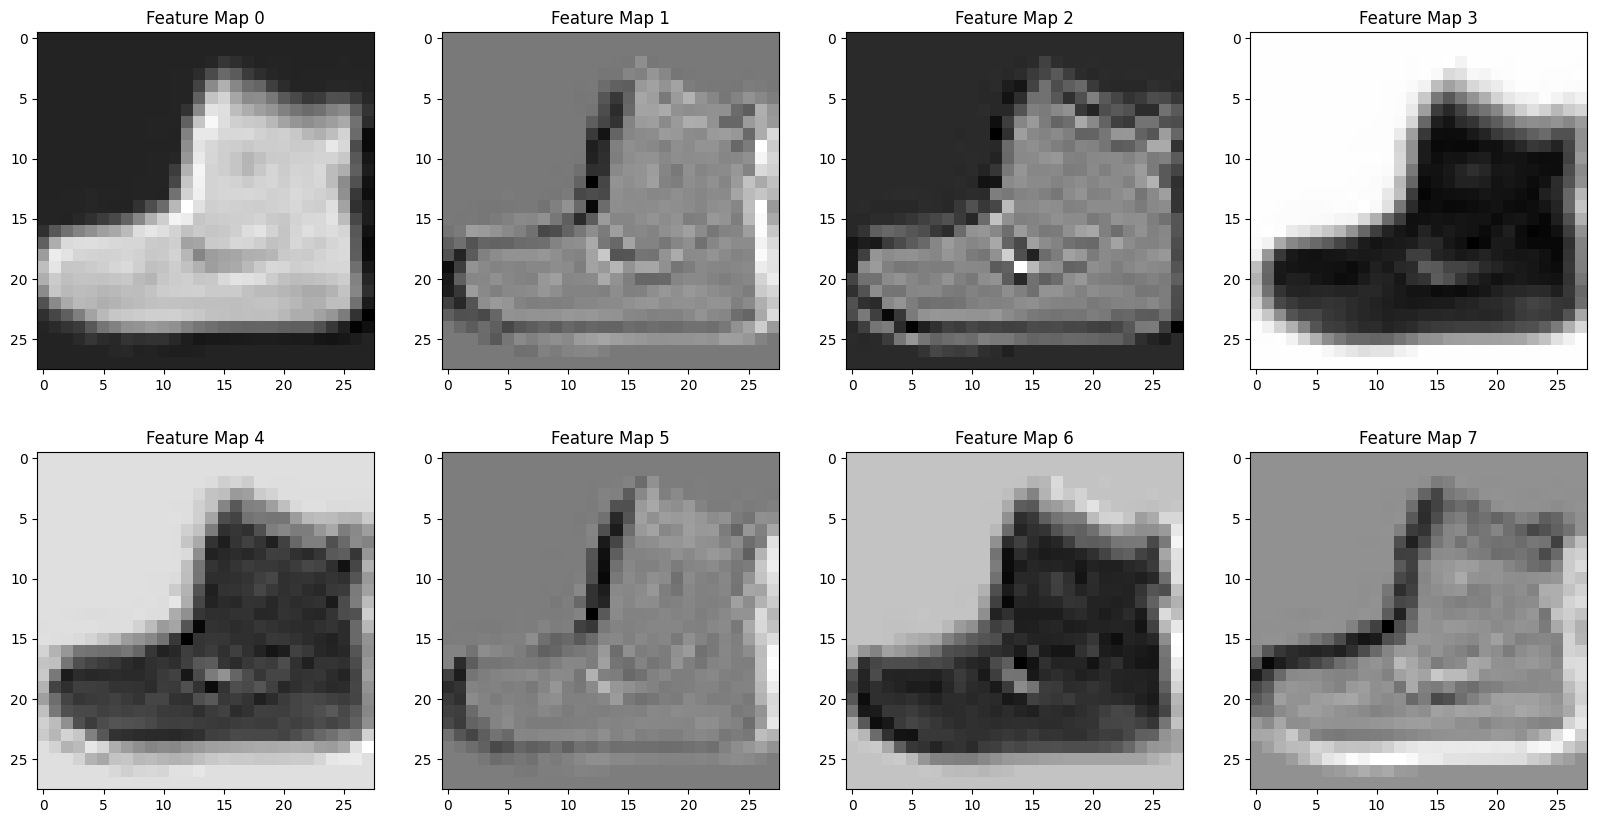

In [9]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
counter = 0
for i in range(2):
  for j in range(4):
    ax[i, j].imshow(output[0][counter].detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1

In [10]:
pool = nn.MaxPool2d(2)

In [11]:
output_pool = pool(output)

In [12]:
output_pool[0].shape

torch.Size([8, 14, 14])

In [13]:
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding = 1)

In [14]:
output_conv2 = conv2(output_pool)


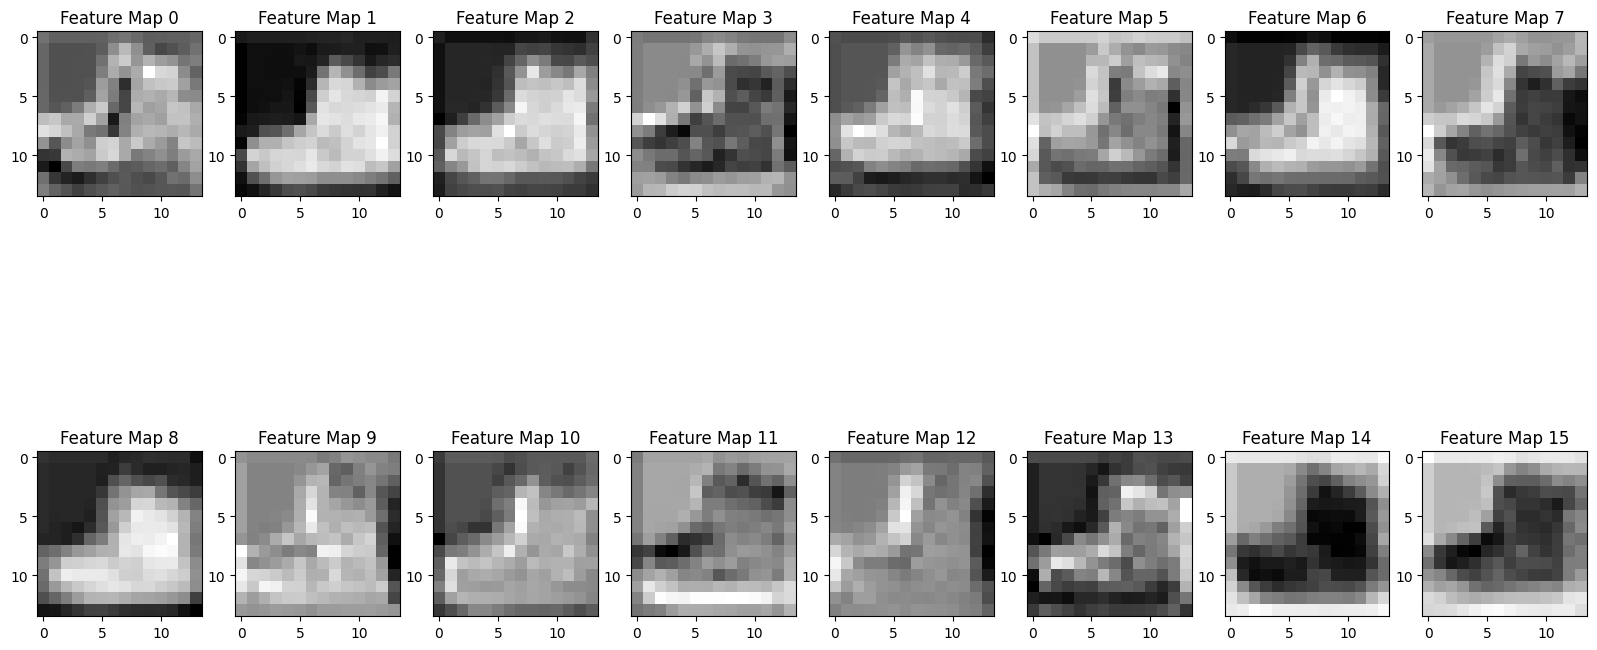

In [15]:
fig, ax = plt.subplots(2, 8, figsize = (20, 10))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(output_conv2[0][counter].detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1

In [16]:
flattener = nn.Flatten()

In [17]:
flattener(output_conv2)

tensor([[-0.0402, -0.0749, -0.0749,  ...,  0.0985,  0.1008,  0.0570]],
       grad_fn=<ViewBackward0>)

In [18]:
flattener(pool(output_conv2)).shape

torch.Size([1, 784])

In [19]:
16*7*7

784

In [20]:
linear1 = nn.Linear(in_features=16*7*7, out_features=128)
linear2 = nn.Linear(in_features = 128, out_features = 10)
conv_activation = nn.Tanh()
linear_activation = nn.ReLU()

In [21]:
model = nn.Sequential(conv1, conv_activation, pool,
                      conv2, conv_activation, pool,
                      flattener,
                      linear1, linear_activation,
                      linear2)

In [22]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [23]:
loss_fn = nn.CrossEntropyLoss()

In [24]:
from tqdm import tqdm

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [26]:
losses = []
for epoch in tqdm(range(20)):
  for X, y in trainloader:
    X, y = X.to(device), y.to(device)
    yhat = model(X)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss.item())
  print(f'Epoch {epoch} Loss: {loss.item()}')

  5%|▌         | 1/20 [00:10<03:25, 10.83s/it]

Epoch 0 Loss: 0.6567175388336182


 10%|█         | 2/20 [00:20<03:00, 10.04s/it]

Epoch 1 Loss: 0.5261340141296387


 15%|█▌        | 3/20 [00:29<02:45,  9.73s/it]

Epoch 2 Loss: 0.44638901948928833


 20%|██        | 4/20 [00:39<02:33,  9.59s/it]

Epoch 3 Loss: 0.39436614513397217


 25%|██▌       | 5/20 [00:48<02:22,  9.52s/it]

Epoch 4 Loss: 0.3513825833797455


 30%|███       | 6/20 [00:57<02:12,  9.46s/it]

Epoch 5 Loss: 0.32126080989837646


 35%|███▌      | 7/20 [01:07<02:02,  9.39s/it]

Epoch 6 Loss: 0.29670247435569763


 40%|████      | 8/20 [01:16<01:52,  9.36s/it]

Epoch 7 Loss: 0.27778732776641846


 45%|████▌     | 9/20 [01:25<01:42,  9.33s/it]

Epoch 8 Loss: 0.2600334584712982


 50%|█████     | 10/20 [01:34<01:33,  9.31s/it]

Epoch 9 Loss: 0.24694637954235077


 55%|█████▌    | 11/20 [01:44<01:23,  9.31s/it]

Epoch 10 Loss: 0.236252099275589


 60%|██████    | 12/20 [01:53<01:14,  9.33s/it]

Epoch 11 Loss: 0.22740080952644348


 65%|██████▌   | 13/20 [02:02<01:05,  9.34s/it]

Epoch 12 Loss: 0.21641753613948822


 70%|███████   | 14/20 [02:12<00:55,  9.32s/it]

Epoch 13 Loss: 0.20898191630840302


 75%|███████▌  | 15/20 [02:21<00:46,  9.30s/it]

Epoch 14 Loss: 0.2006460428237915


 80%|████████  | 16/20 [02:30<00:37,  9.28s/it]

Epoch 15 Loss: 0.19475816190242767


 85%|████████▌ | 17/20 [02:39<00:27,  9.29s/it]

Epoch 16 Loss: 0.18788769841194153


 90%|█████████ | 18/20 [02:49<00:18,  9.27s/it]

Epoch 17 Loss: 0.18250395357608795


 95%|█████████▌| 19/20 [02:58<00:09,  9.39s/it]

Epoch 18 Loss: 0.17455258965492249


100%|██████████| 20/20 [03:08<00:00,  9.43s/it]

Epoch 19 Loss: 0.17276710271835327


In [27]:
model

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Tanh()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Tanh()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=784, out_features=128, bias=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=10, bias=True)
)

Exploring what the network is paying attention to by visualizing the results of the convolutions after being trained for 20 epochs.  

In [28]:
x = train[0][0].to(device)
for layer in model:
  print(layer)
  if isinstance(layer, nn.Flatten):
    break
  x = layer(x)


Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_dim=1, end_dim=-1)


In [29]:
x.shape

torch.Size([16, 7, 7])

In [30]:
fig, ax = plt.subplots(2, 8, figsize = (20, 5))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(x[counter].cpu().detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1
fig.suptitle('Feature maps after training for 20 epochs');

In [31]:
x = train[1][0].to(device)
for layer in model:
  print(layer)
  if isinstance(layer, nn.Flatten):
    break
  x = layer(x)

Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_dim=1, end_dim=-1)


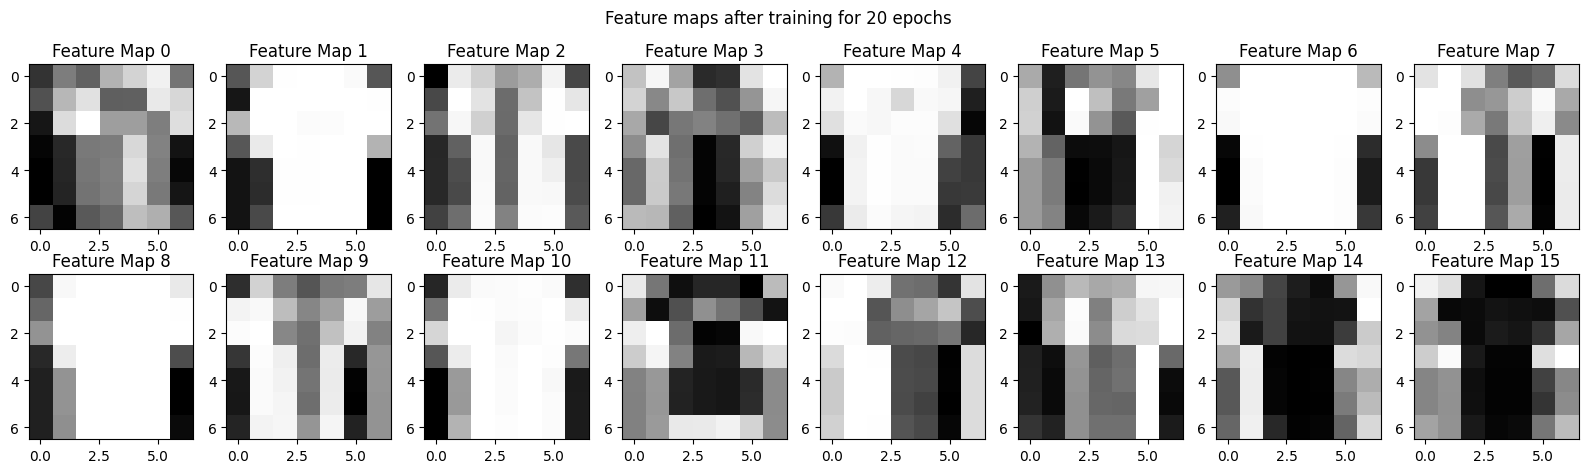

In [32]:
fig, ax = plt.subplots(2, 8, figsize = (20, 5))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(x[counter].cpu().detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1
fig.suptitle('Feature maps after training for 20 epochs');

In [33]:
correct = 0
total = 0
for x, y in trainloader:
  x, y = x.to(device), y.to(device)
  yhat = model(x)
  correct += (torch.argmax(yhat, dim = 1) == y).sum()
  total += len(y)

In [34]:
correct/total

tensor(0.9143, device='cuda:0')

In [35]:
torch.save(model, 'fashionmodel.pt')

In [146]:
from torchvision.models import resnet50, ResNet50_Weights

In [147]:
#loading in the prebuilt model weights
weights = ResNet50_Weights.DEFAULT
#loads in the transformations to the images that need
#to happen before the image goes into the network
transforms = weights.transforms()

In [148]:
#load model and weights
model = resnet50(weights = weights)

In [149]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Using our own data

Here is a link to a dataset containing images of cats and dogs.  [link](https://drive.google.com/drive/folders/1K69gJB65WiIUO69ork2WI-39VNHdHChM?usp=drive_link)

Save this in your google drive and adjust the link below accordingly.

In [150]:
model.fc = nn.Linear(2048, 2)

In [151]:
model.fc

Linear(in_features=2048, out_features=2, bias=True)

In [152]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tqdm import tqdm

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:

path = 'drive/MyDrive/small/train/'

In [155]:
train = ImageFolder(path, transform=transforms)
val = ImageFolder('drive/MyDrive/small/val/', transform = transforms)

In [156]:
trainloader = DataLoader(train, batch_size = 32)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [157]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [158]:
transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [159]:
model = model.to(device)
# model.eval()
for epoch in tqdm(range(20)):
  for x,y in trainloader:
    #x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss: {loss.item()}')

  5%|▌         | 1/20 [00:16<05:18, 16.75s/it]

Epoch 0 Loss: 0.043970320373773575


 10%|█         | 2/20 [00:29<04:23, 14.64s/it]

Epoch 1 Loss: 0.05635027959942818


 15%|█▌        | 3/20 [00:43<03:57, 13.97s/it]

Epoch 2 Loss: 0.0582401268184185


 20%|██        | 4/20 [00:56<03:38, 13.66s/it]

Epoch 3 Loss: 0.0518515482544899


 25%|██▌       | 5/20 [01:09<03:23, 13.54s/it]

Epoch 4 Loss: 0.04258507117629051


 30%|███       | 6/20 [01:22<03:07, 13.43s/it]

Epoch 5 Loss: 0.03433478996157646


 35%|███▌      | 7/20 [01:36<02:53, 13.37s/it]

Epoch 6 Loss: 0.02757662907242775


 40%|████      | 8/20 [01:49<02:40, 13.37s/it]

Epoch 7 Loss: 0.021891286596655846


 45%|████▌     | 9/20 [02:02<02:26, 13.31s/it]

Epoch 8 Loss: 0.0173431858420372


 50%|█████     | 10/20 [02:15<02:13, 13.31s/it]

Epoch 9 Loss: 0.013938832096755505


 55%|█████▌    | 11/20 [02:29<02:01, 13.46s/it]

Epoch 10 Loss: 0.011281240731477737


 60%|██████    | 12/20 [02:42<01:47, 13.38s/it]

Epoch 11 Loss: 0.009318061172962189


 65%|██████▌   | 13/20 [02:56<01:33, 13.36s/it]

Epoch 12 Loss: 0.007778175640851259


 70%|███████   | 14/20 [03:09<01:20, 13.34s/it]

Epoch 13 Loss: 0.006601898465305567


 75%|███████▌  | 15/20 [03:22<01:06, 13.31s/it]

Epoch 14 Loss: 0.005683417432010174


 80%|████████  | 16/20 [03:36<00:53, 13.32s/it]

Epoch 15 Loss: 0.004946483764797449


 85%|████████▌ | 17/20 [03:49<00:39, 13.32s/it]

Epoch 16 Loss: 0.004376062657684088


 90%|█████████ | 18/20 [04:02<00:26, 13.38s/it]

Epoch 17 Loss: 0.003895151661708951


 95%|█████████▌| 19/20 [04:16<00:13, 13.31s/it]

Epoch 18 Loss: 0.0034960140474140644


100%|██████████| 20/20 [04:29<00:00, 13.47s/it]

Epoch 19 Loss: 0.0031750774942338467


In [91]:
torch.save(model, 'catdog.pt')

In [167]:
model.eval()
correct = 0
total = 0
model = model.to(device)
for x,y in trainloader:
    # x,y = x.to(device), y.to(device)
    # x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

In [168]:
correct/total

tensor(0.9963, device='cuda:0')

In [162]:
valloader = DataLoader(val, batch_size=32)

In [163]:
correct = 0
total = 0
model = model.to(device)
model.eval()
for x,y in tqdm(valloader):
    x,y = x.to(device), y.to(device)
    #x = transforms(x)
    #x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

100%|██████████| 34/34 [00:06<00:00,  5.45it/s]


In [164]:
correct/total

tensor(0.9728, device='cuda:0')